<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Density'>

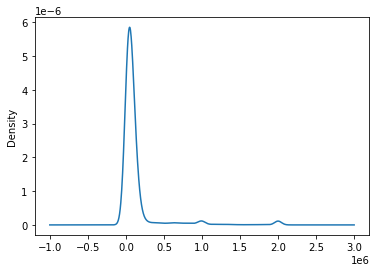

In [3]:
df['ConvertedComp'].plot.density()

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

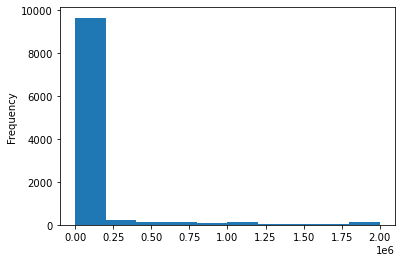

In [4]:
df['ConvertedComp'].plot.hist()

What is the median of the column `ConvertedComp`?


In [5]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [6]:
len(df[df['Gender'] == 'Man'])

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
df[df['Gender'] == 'Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
min_age = df['Age'].min()
q1_age = df['Age'].quantile(.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(.75)
max_age = df['Age'].max()
print(min_age)
print(q1_age)
print(median_age)
print(q3_age)
print(max_age)

16.0
25.0
29.0
35.0
99.0


Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

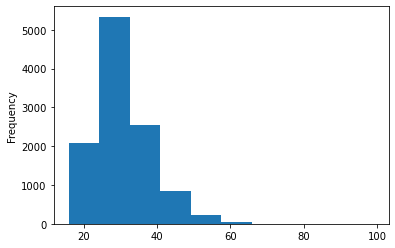

In [9]:
df['Age'].plot.hist()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

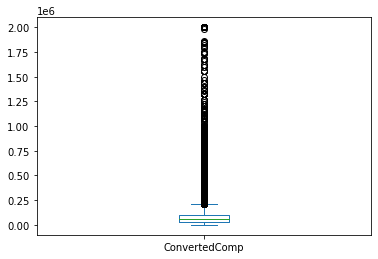

In [10]:
df['ConvertedComp'].plot.box()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
q1_comp = df['ConvertedComp'].quantile(.25)
median_comp = df['ConvertedComp'].median()
q3_comp = df['ConvertedComp'].quantile(.75)
print(q1_comp)
print(median_comp)
print(q3_comp)

26868.0
57745.0
100000.0


Find out the upper and lower bounds.


In [12]:
min_comp = df['ConvertedComp'].min()
max_comp = df['ConvertedComp'].max()
print(min_comp)
print(max_comp)

0.0
2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
iqr_comp = q3_comp - q1_comp
upper_fence_comp = q3_comp + (1.5 * iqr_comp)
lower_fence_comp = q1_comp - (1.5 * iqr_comp)
len(df[(df['ConvertedComp'] > upper_fence_comp) | (df['ConvertedComp'] < lower_fence_comp)])

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [17]:
df = df[(df['ConvertedComp'] <= upper_fence_comp) & (df['ConvertedComp'] >= lower_fence_comp)]
median_comp = df['ConvertedComp'].median()
mean_comp = df['ConvertedComp'].mean()
print(median_comp)
print(mean_comp)

52704.0
59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [15]:
df.corrwith(df['Age'])

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
